In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

Import all the necessary library in the cell below

In [4]:
import numpy as np
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt
import  seaborn as sb
from numpy.linalg import solve
from scipy.optimize import fsolve

**Problem 1**

1- Load the titanic dataset from the seaborn package.

In [3]:
datas = sb.load_dataset("titanic")

2- how many columns in this dataset?

In [4]:
len(datas.columns)

15

3- list the names of all columns and describe the datatype of each column? 

In [94]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


4- Count the number of missing values in each column

In [93]:
datas.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

5- Clean the dataset by removing every record that contains a missing value? 

In [ ]:
datas.dropna()

6 - Compute the average age of females and males who survived? 

In [7]:
result = datas.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'age':'mean'})

6 - Count how many people survived by age and sex. Display the result as DataFrame. 

In [8]:
result1 =datas.pivot_table(index=['age'], columns=['sex'], values='survived', aggfunc='count')

7- Build a logistic regression model using the pclass, age, parch, sex, and fare columns as explanatory variables and the survived column as response variable

8- Measure its performance using accuracy score and display the confusion matrix. 

9- Interpret the result

**Problem 2**

Let assume we have the one dimensional process model
\begin{equation}
x_i = \alpha x_{i-1}+\delta_i, \text{ with }\delta_i\thicksim \mathcal{N}(0,q^2),\;\; i = 1,\cdots,N ,
\end{equation}
and $x_0\thicksim \mathcal{N}(\mu,r^2)$. Assume the data model is 

\begin{equation}
y_i = h_i x_{i}+\epsilon_i, \text{ with }\epsilon_i\thicksim \mathcal{N}(0,s^2),\;\; i = 1,\cdots,N ,
\end{equation}
where
$$
h_i =\begin{cases}
 1, \;\;& i=&1,\cdots,N_1\\
0.1, & i=&N_1+1,\cdots, N_2\\
0.9, & i=&N_2+1,\cdots,N
\end{cases}.
$$
Note that $N_1<N_2<N$.

1- Write Python function called **Process** that takes $\alpha, N, q, \mu, r$ and return the array $x$ of the $x_i, i=0,\cdots,N$.

In [12]:
def Process(alpha,N,q,mu,r):
    x=np.zeros(N+1)
    x[0]=np.random.normal(mu,1)
    for i in range(1,N+1):
        x[i]=alpha*x[i-1]+np.random.normal(0, q)
    return x

2- Write Python function called **Data** that takes array $x$ of the $x_i$, $s, N_1, N_2, N$ and return the array $y$ of $y_i,i=1,\cdots,N$

In [10]:
def Data(xi,s,N1,N2,N):
    xi=Process(alpha,N,q)
    hi=np.linspace(N1,N2,N)
    y=np.zeros(N)
    for i in range(N):
        y[i]=h[i]*xi[i]+np.random.normal(0,s)
    return y

3- Write a program to plot the data on the same graph as the process model, for \begin{equation}
r = 0.1, q=0.4, s=0.9, \mu = 0.01, h= 1, \alpha = 0.8,N = 50,  N_1 = 20,  N_2 = 30
\end{equation}

4- Use the general formulas given for the Kalman filter to find the one dimensional formulas for

\begin{equation}
\mu_{1\mid 0}, \sigma_{1\mid 0}, k_1, \mu_{1\mid 1},\sigma_{1\mid 1},
\end{equation}
in term of $\alpha, q,r,s,\mu$ and $y_1$ (write the answer as markdown)

5- Using the general formulas given for the Kalman filter, write Python program to calculate
\begin{equation}
\mu_{i\mid i-1}, \sigma_{i\mid i-1}, k_i, \mu_{i\mid i},\sigma_{i\mid i},
\end{equation}
for $i=1,\cdots, N$. Be sure to
initialize the loop over $i$. Hint: I suggest using $\text{mu\_old}[i]$ for $\mu_{i\mid i-1}$, $\text{sigma\_old}[i]$ for $\sigma_{i\mid i-1}$, $\text{mu\_new}[i]$ for $\mu_{i\mid i}$, $\text{sigma\_new}[i]$ for $\sigma_{i\mid i}$

6- Write a Python program to plot the states $x_i$ and data $y_i$ together with the filtered and forecasted estimates on the same graph.

**Problem 3**

1- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=2}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,N, f$ as inputs and return Z. Here, ``N = 50`` is the default value.

In [52]:
def Trap(a, b, f, N=50):
    H=(b-a)/N
    x = np.linspace(a, b, N+1)
    Z = 0
    for k in range(2, N+1):
        Z += H*(f(x[k-1]) + f(x[k]))/2
    return Z

2- Let $m_k$  be the midpoint of the subinterval $[x_k,x_{k+1}]$ for all $k=1,\cdots,N-1$, we have 

$$\int_a^bf(x)dx \approx \sum_{m_k} f(m_{k})H = W$$

Write a function named <b>Mid</b> that takes $a,b,N, f$ as inputs and return W. Here, ``N = 50`` is the default value.

In [55]:
def Mid(a,b,f,N=50):
    H=(b-a)/N
    W=0
    m=np.zeros(N)
    x=np.linspace(a, b, N+1)
    for k in range(1,len(m)):
        m[k]=(x[k]+x[k+1])/2
        W+=f(m[k])*H
    return W

3- Using **Trap, Mid** and python inbuilt function **quad**, compute and display the integral 

$$A = \int_0^{\sqrt{\ln(2)}}xe^{x^2}dx$$

In [56]:
f=lambda x:x*np.exp(x**2)
A_quad=quad(f,0,np.sqrt(np.log(2)))[0]
print(A_quad)
A_Trap=Trap(0,np.sqrt(np.log(2)),f)
print(A_Trap)
A_Mid=Mid(0,np.sqrt(np.log(2)),f)
print(A_Mid)

0.4999999999999998
0.4999484924171499
0.49981778268691585


4- After computing the exact value of $A$, write a Python program that searches for the minimun values $N_{Trap}, N_{Mid}$ less than 10000 such that **Trap, Mid**, respectively, give a better approximation of $A$ then **quad**.  If any the value  $ N_{Trap}, N_{Mid}$ doesn't exist your program should print the string **No $N_{Trap}$ found** or **No $N_{Mid}$ found**, respectively.

In [51]:
Ntrap=50
Etrap=abs(0.5-Trap(0,(np.log(2))**0.5,f,Ntrap))
while Ntrap<10000 and Etrap>=abs(0.5-A_quad):
    Ntrap+=1
    Etrap=abs(0.5-Trap(0,(np.log(2))**0.5,f,Ntrap))
if Ntrap>=10000:
    print("No Ntrap Found")
else:
    print("N Trap=",Ntrap)

        
Nmid=50
Emid=abs(0.5-Mid(0,(np.log(2))**0.5,f,Nmid))
while Nmid<10000 and Emid>=abs(0.5-A_quad):
    Nmid+=1
    Emid=abs(0.5-Mid(0,(np.log(2))**0.5,f,Nmid))
if Ntrap>=10000:
    print("No N mid Found")
else:
    print("N Mid=",Nmid)

No Ntrap Found
No N mid Found


In [50]:
A=0.5
Ntrap=0
Nmid=0
errquad=abs(A-quad(f,0,np.sqrt(np.log(2)))[0])
for i in range(2,10000):
    if Ntrap==0:
        if abs(A-Trap(0,np.sqrt(np.log(2)),f))<errquad:
            Ntrap=i
    if Nmid==0:
        if abs(A-Mid(0,np.sqrt(np.log(2)),f))<errquad:
            Nmid=i
    
if Nmid!=0 and Ntrap!=0:
    print('Nmid=',Nmid,'Ntrap=',Ntrap)
else:
    if Ntrap==0:
        print('No Ntrap found')
    if Nmid==0:
        print('No Nmid found')

No Ntrap found
No Nmid found


**Problem 4**

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_0<t_1<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_0,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_0)& x_2(t_0)&\cdots& x_{M}(t_0)\\
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [20]:
def EulerOdeSys(f,c,t):
    H=t[1]-t[0]
    N=len(t)
    M=len(c)
    z=np.zeros((N,M))
    z[0]=c
    for k in range(N-1):
        z[k+1]=z[k]+H*f(z[k],t[k])
    return z

2. Write a python function <b> RalstonOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the Ralston method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+\dfrac{2}{3}Hk_1, t_k + \dfrac{2}{3}H),\\\\
z_{k+1} = z_k + H(\dfrac{1}{4}k_1+\dfrac{3}{4}k_2)
\end{cases}
\end{equation}


In [29]:
def RalstonOdeSys(f,c,t):
    H=t[1]-t[0]
    N=len(t)
    M=len(c)
    z=np.zeros((N,M))
    z[0]=c
    for k in range(N-1):
        k1=f(z[k],t[k])
        k2=f(z[k]+(2/3)*H*k1,t[k]+(2/3)*H)
        z[k+1]=z[k]+H*(1/4*k1+3/4*k2)
    return z

**Problem 5**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + \dfrac{d y}{dx}-6y = 0 \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=0 , y(a) = 1
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g(x) = \dfrac{3}{5}e^{2x}+ \dfrac{2}{5}e^{-3x}$ is the exact solution. Let us denote $e_k = \mid g_k - y_k\mid$

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,N$ (with $N= 100$ as default value) and return array of all $x_k$, $y_k$, $g_k$ and $e_k$.


In [26]:
def SODE(a,b,N=100):
    
    y0 = [1,0]
    def models(v,x):
        y,z = v
        dydx = z
        dzdx = -z+6*y
        return np.array([dydx,dzdx])
    g=lambda x:3/5*(np.exp(2*x))+2/5*(np.exp(-3*x))
    xk = np.linspace(a,b,N)
    gk=g(xk)
    u = odeint(models,y0,xk)
    yk=u[:,0]
    ek=np.abs(gk-yk)
    
    return xk,yk,gk,ek

2- Using **SODE**, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

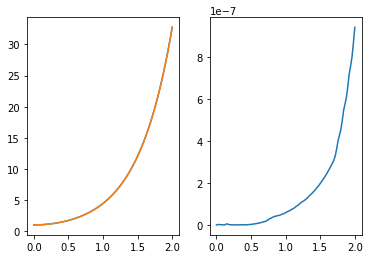

In [27]:
xk,yk,gk,ek=SODE(0,2)

plt.subplot(1,2,1)
plt.plot(xk,yk)
plt.plot(xk,gk)

plt.subplot(1,2,2)
plt.plot(xk,ek)

3- Using <b> RalstonOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

In [30]:
def mod(v,x):
    y,z = v
    dydx = z
    dzdx = -z+6*y
    return np.array([dydx,dzdx])

c=np.array([1,1,1])
t=np.linspace(0,2,100)
z=RalstonOdeSys(mod,c,t)
plt.plot(z[:,0])
plt.show()

ValueError: too many values to unpack (expected 2)

4- Using <b> EulerOdeSys </b>, solve the second-order differential equation for $a = 0, b = 2$ and use subplot to plot side by side
- $y_k$ and $g_k$ vs $x_k$
- $e_k$ vs $x_k$

In [33]:
def mod1(v,x):
    y,z = v
    dydx = z
    dzdx = -z+6*y
    return np.array([dydx,dzdx])

c=np.array([1,1,1])
t=np.linspace(0,2,100)
xk,yk=EulerOdeSys(mod,c,t)
plt.plot
plt.plot(t,z[:,0])
plt.show()

ValueError: too many values to unpack (expected 2)

5- The L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$


Write a function called **L2_error** that takes $a,b,H$ and return the L2 error $g_k$ and the approximate solution $y_k$ obtained using **SODE**, **RalstonOdeSys** and **EulerOdeSys**.

In [35]:
def L2_error(a, b, H):
    Yks = SODE(a,b,H)[1]
    Gks = (SODE(a,b,H)[0])
    
    YkR = RalstonOdeSys(f,c,t)[1]
    GkR = (RalstonOdeSys(f,c,t)[0])
    
    YkE = EulerOdeSys(f,c,t)[1]
    GkE = (EulerOdeSys(f,c,t)[0])
    
    N = int((b-a)/H)
    totalsode = 0
    totalRalstn=0
    totaleur=0
    for i in range(0, N+1):
        totalsode += (H*(YKs[i] - GKs[i])**2)
        totalRalstn += (H*(YKR[i] - GKR[i])**2)
        totaleur += (H*(YKE[i] - GKE[i])**2)
        
    return (totalsode,totalRalstn,totaleur)

6- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Using **SODE**, **RalstonOdeSys** and **EulerOdeSys**, compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

In [36]:
H = np.array([10**(-1),10**(-2),10**(-3),10**(-4)])

for i in range(len(H)):
    𝐿2𝐸𝑟𝑗 = np.array([L2_error(0, 2, i)])
print("𝐿2𝐸𝑟𝑗 = ", 𝐿2𝐸𝑟𝑗)

TypeError: <lambda>() takes 1 positional argument but 2 were given

7- For each method **SODE**, **RalstonOdeSys** and **EulerOdeSys**, plot in the same graph $log(L2Er_j)$ vs $log(H_j)$.

8- By assuming that $log(H_j)$ is the explanatory variable of $log(L2Er_j)$, complete the simple linear regression in the case of  **RalstonOdeSys**, **EulerOdeSys** and display the regression coeficient.

Note: Use the whole data to train your linear model.

**Problem 6**

1-The cost of admission to the world cup 2022 game is
- 320 USD for 3 children, 1 female  and 1 male 
- 600 USD  for 4 females and 2 males 
- 600 USD  for 5 children, 2 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)

Let x- represent Children\\
    y- represent female\\
    z- represent male\\
    
    
The system of equation is 
\begin{equation}
\begin{cases}
 3x+y+z=320\\
 4y+2z=600\\
 5x+2y+2z=600
\end{cases}
\end{equation}


2- Write a Python code to compute and display how much is the admission for each child, female and male?

In [7]:
A=np.array([[3,1,1],[0,4,2],[5,2,2]])
B=np.array([320,600,600])
c=np.linalg.solve(A,B)
print('children=',c[0])
print('female=',c[1])
print('male=',c[2])

children= 39.99999999999996
female= 99.9999999999999
male= 100.0000000000002


3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    e^{x^2} + x = sin(y)\\
    2e^x + cos(y) = 2
\end{cases}
\end{equation}


In [37]:
def nonlinear(s):
  x,y=s
  F=np.empty([2])
  F[0]=np.exp(x**2)+x-np.sin(y)
  F[1]=2*(np.exp(x))+np.cos(y)-2
  return F
Guess_val=np.array([1,1])
v=fsolve(nonlinear, Guess_val)
v

array([-0.37939153, -5.39580392])